<a href="https://colab.research.google.com/github/13apoorva/ML_DL_MINI_PROJECTS/blob/main/Neural_networking_sentiment_analysis%20/NN_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
df=pd.read_csv('/content/NLP.csv')

In [ ]:
df.shape

(710, 2)

In [ ]:
df.head()

,Review,Rating
0,My best brand Fasttrack I like it is nice watc...,5.0
1,This is very good midrange watch from Fastrack...,5.0
2,Very very good product I liked it so much look...,4.0
3,I really like big dials eventhough my parents ...,5.0
4,Genuine product from fast track at affordable ...,5.0


In [ ]:
df.isnull().sum()

Review     0
Rating    39
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.tail()

,Review,Rating
666,Nice product,5.0
667,Cool one ...,5.0
668,Good,4.0
669,Good quality,5.0
670,Awsome,5.0


In [ ]:
df_neg = df.loc[df["Rating"]<=3.0]
df_neg=df_neg.reset_index(drop=True)

In [ ]:
df_pos = df.loc[df["Rating"]>=4.0]
df_pos=df_pos.reset_index(drop=True)

In [ ]:
df_all=pd.concat([df_neg,df_pos],axis=0)
df_all=df_all.reset_index(drop=True)

In [ ]:
df_all['Sentiment']=np.where(df_all["Rating"]==5.0,"Positive","Negative")

In [ ]:
df_all.head()

,Review,Rating,Sentiment
0,product is good ..but very light . metal body ...,3.0,Negative
1,Great watch at this price segment... Soft mate...,3.0,Negative
2,Good watch for the people who wants to buy bel...,3.0,Negative
3,wrist size is more then 8cm was is good and yo...,3.0,Negative
4,"It's a nice watch ,cool looking not too funky ...",3.0,Negative


In [ ]:
df_all.tail()

,Review,Rating,Sentiment
666,Nice product,5.0,Positive
667,Cool one ...,5.0,Positive
668,Good,4.0,Negative
669,Good quality,5.0,Positive
670,Awsome,5.0,Positive


In [ ]:
df_all.shape

(671, 3)

In [ ]:
df_all['Sentiment'].value_counts()

Positive    507
Negative    164
Name: Sentiment, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
y=df_all['Sentiment'].values
y

array(['Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positi

In [ ]:
y=le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,

In [ ]:
df_all['Review'][0]

'product is good ..but very light . metal body in place of plastic will pretty good .'

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sw=set(stopwords.words('english'))

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
corpus=[]
for i in range(0,671):
  review=re.sub('[^a-zA-Z]',' ',df_all['Review'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=5000,max_df=0.5)

In [ ]:
x=cv.fit_transform(corpus)

In [ ]:
tfidf=TfidfTransformer()
x=tfidf.fit_transform(x)

In [ ]:
from keras import models
from keras.layers import Dense


In [ ]:
model= models.Sequential()
model.add(Dense(25,activation="relu",input_shape=[x.shape[1],]))
model.add(Dense(25,activation="sigmoid"))

model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                22525     
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
x_val=x[ :500]
x_train=x[500: ]
y_val=y[ :500]
y_train=y[500: ]

In [ ]:
x_train = x_train.toarray()
x_val = x_val.toarray()
x_train = np.expand_dims(x_train, axis=-1)
x_val = np.expand_dims(x_val, axis=-1)

In [ ]:
hist=model.fit(x_train,y_train, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
6/6 [==============================] - 1s 51ms/step - loss: 0.7948 - accuracy: 0.2339 - val_loss: 0.7517 - val_accuracy: 0.2480
Epoch 2/10
6/6 [==============================] - 0s 13ms/step - loss: 0.7401 - accuracy: 0.2339 - val_loss: 0.7174 - val_accuracy: 0.2480
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.7059 - accuracy: 0.2632 - val_loss: 0.6881 - val_accuracy: 0.6700
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 0.6756 - accuracy: 0.7778 - val_loss: 0.6643 - val_accuracy: 0.7520
Epoch 5/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6496 - accuracy: 0.7661 - val_loss: 0.6411 - val_accuracy: 0.7520
Epoch 6/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6255 - accuracy: 0.7661 - val_loss: 0.6237 - val_accuracy: 0.7520
Epoch 7/10
6/6 [==============================] - 0s 27ms/step - loss: 0.6053 - accuracy: 0.7661 - val_loss: 0.6073 - val_accuracy: 0.7520
Epoch 8/10
6/6 [===========

In [ ]:
result=hist.history

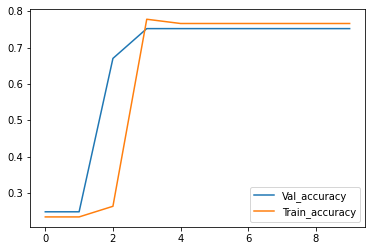

In [ ]:
plt.plot(result['val_accuracy'],label="Val_accuracy")
plt.plot(result['accuracy'],label='Train_accuracy')

plt.legend()
plt.show()


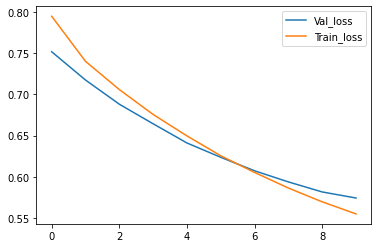

In [ ]:
plt.plot(result['val_loss'],label="Val_loss")
plt.plot(result['loss'],label='Train_loss')

plt.legend()
plt.show()

In [ ]:
model.evaluate(x_val,y_val)

16/16 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7520


[0.574264407157898, 0.7519999742507935]